<a href="https://colab.research.google.com/github/AlyGamalAbusenna/Multiclass-Classification-with-Fashion-MNIST-ANN-/blob/main/7454_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Data Preprocessing

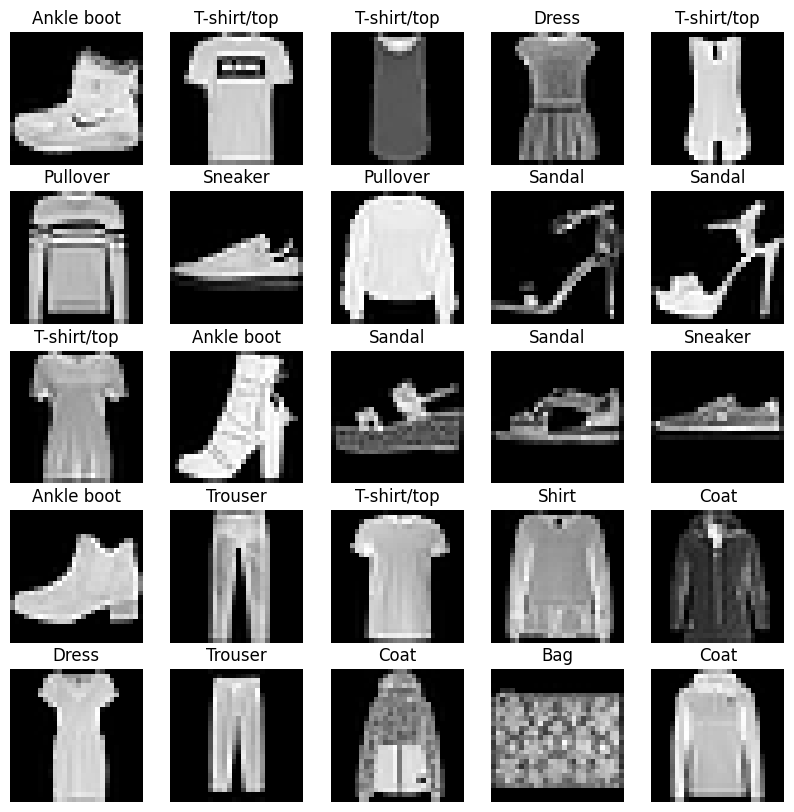

In [3]:
# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images to 784-dimensional vectors
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

# Visualize some images with labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(class_names[train_labels[i]])
    plt.axis("off")
plt.show()


In [4]:
# Print data sizes
print("Training data size:", train_images.shape)
print("Training labels size:", train_labels.shape)
print("Test data size:", test_images.shape)
print("Test labels size:", test_labels.shape)

# Count the number of samples in each class for both training and test sets
unique_train, counts_train = np.unique(train_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)

print("\nClass distribution in the training set:")
for label, count in zip(unique_train, counts_train):
    print(f"Class {class_names[label]}: {count} samples")

print("\nClass distribution in the test set:")
for label, count in zip(unique_test, counts_test):
    print(f"Class {class_names[label]}: {count} samples")


Training data size: (60000, 784)
Training labels size: (60000,)
Test data size: (10000, 784)
Test labels size: (10000,)

Class distribution in the training set:
Class T-shirt/top: 6000 samples
Class Trouser: 6000 samples
Class Pullover: 6000 samples
Class Dress: 6000 samples
Class Coat: 6000 samples
Class Sandal: 6000 samples
Class Shirt: 6000 samples
Class Sneaker: 6000 samples
Class Bag: 6000 samples
Class Ankle boot: 6000 samples

Class distribution in the test set:
Class T-shirt/top: 1000 samples
Class Trouser: 1000 samples
Class Pullover: 1000 samples
Class Dress: 1000 samples
Class Coat: 1000 samples
Class Sandal: 1000 samples
Class Shirt: 1000 samples
Class Sneaker: 1000 samples
Class Bag: 1000 samples
Class Ankle boot: 1000 samples


# Model Architecture

In [11]:
# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [12]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

### Applying Early Stopping and Learning Rate Scheduler

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model with an 80-20 training-validation split
history = model.fit(train_images, train_labels, epochs=100, validation_split=0.2,
                    batch_size=64, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7349 - loss: 0.7488 - val_accuracy: 0.8378 - val_loss: 0.4372 - learning_rate: 0.0010
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8385 - loss: 0.4347 - val_accuracy: 0.8459 - val_loss: 0.4307 - learning_rate: 0.0010
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8525 - loss: 0.3965 - val_accuracy: 0.8637 - val_loss: 0.3840 - learning_rate: 0.0010
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8646 - loss: 0.3681 - val_accuracy: 0.8637 - val_loss: 0.3666 - learning_rate: 0.0010
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8685 - loss: 0.3510 - val_accuracy: 0.8758 - val_loss: 0.3501 - learning_rate: 0.0010
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8743 - loss: 0.3342 - val_accuracy: 0.8753 - val_loss: 0.3393 - learning_rate: 0.0010
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8

# Evaluation

In [14]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict classes
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Classification report
print(classification_report(test_labels, predicted_labels, target_names=class_names))


Test Accuracy: 89.66%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.82      0.82      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.83      0.81      0.82      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.72      0.73      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Confusion Matrix

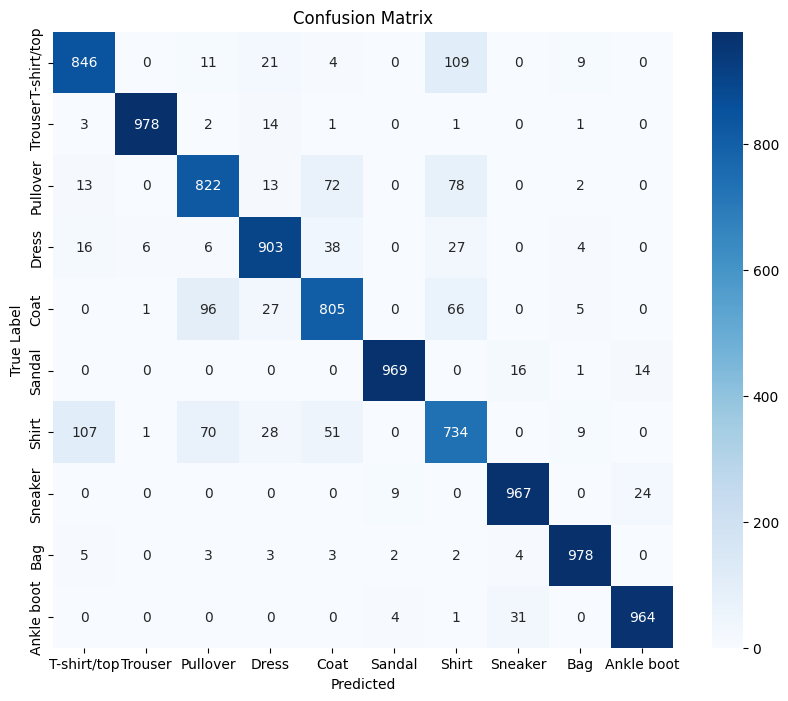

In [15]:
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Plot Accuracy and Loss Curves

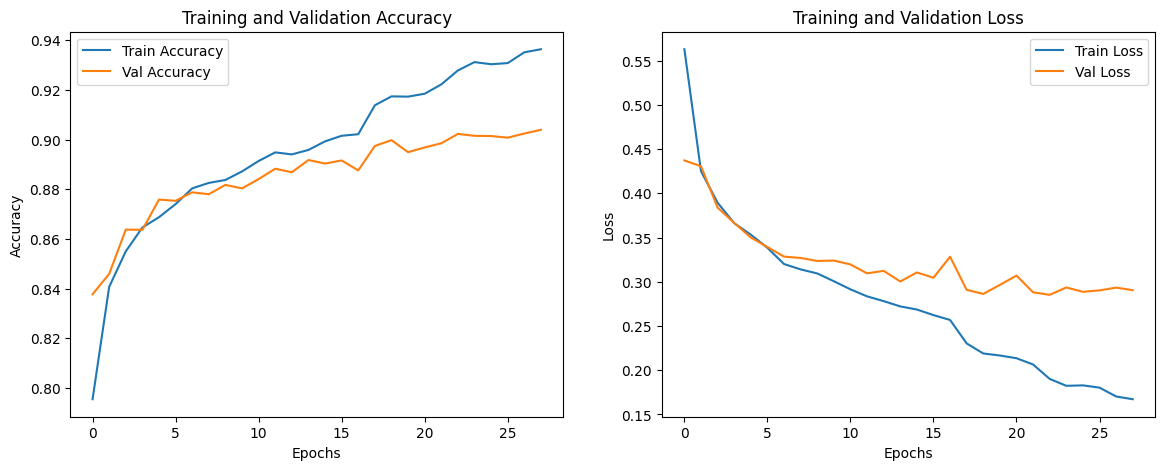

In [16]:
# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()
